In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
# !pip install xlrd # runs cmd on system

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')
maternity_leave = pd.read_excel('../data/Maternity leave benefits.xls', skiprows= 2)
country_id = pd.read_csv('../data/UNSD — Methodology.csv', delimiter = ';', skiprows=[66, 125, 126]) # errors in line 67, 125, 127

- Source for Maternity Leave Dataset: https://data.un.org/DocumentData.aspx?id=344
- Source for Country ID Dataset: https://unstats.un.org/unsd/methodology/m49/overview/

In [3]:
# inspect each dataset - Maternity Leave Dataset
print('Maternity Leave Dataset:')
display(maternity_leave.head(5))
display(maternity_leave.tail(5))

# inspect each dataset - Country ID Dataset
print('\nStandard country or area codes (M49) for country specification:')
display(country_id.head(5))
display(country_id.tail(5))

Maternity Leave Dataset:


,Country or area,Length of maternity \nleave,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Percentage of wages paid in covered period (%),Unnamed: 7,Unnamed: 8,Provider of benefit
0,Afghanistan,NaN,90,days,NaN,NaN,100,NaN,NaN,Employer
1,Albania,NaN,365,calendar days,NaN,NaN,"80, 50",a,NaN,Social insurance system
2,Algeria,NaN,14,weeks,NaN,NaN,100,NaN,NaN,Social security
3,Andora,NaN,16,weeks,NaN,NaN,100,NaN,NaN,Social insurance system
4,Angola,NaN,12,weeks,NaN,NaN,100,NaN,NaN,Social security and Employer


,Country or area,Length of maternity \nleave,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Percentage of wages paid in covered period (%),Unnamed: 7,Unnamed: 8,Provider of benefit
176,Venezuela,NaN,18,weeks,NaN,NaN,100,NaN,NaN,Social security
177,Viet Nam,NaN,4-6,months,s2,NaN,100,NaN,NaN,Social insurance fund
178,Yemen,NaN,60,days,NaN,NaN,100,NaN,NaN,Employer
179,Zambia,NaN,12,weeks,NaN,NaN,100,NaN,NaN,Employer
180,Zimbabwe,NaN,98,days,NaN,NaN,100,NaN,NaN,Employer



Standard country or area codes (M49) for country specification:


,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN


,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
240,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Samoa,882,WS,WSM,NaN,NaN,x
241,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tokelau,772,TK,TKL,NaN,NaN,NaN
242,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tonga,776,TO,TON,NaN,NaN,x
243,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tuvalu,798,TV,TUV,x,NaN,x
244,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Wallis and Futuna Islands,876,WF,WLF,NaN,NaN,NaN


In [4]:
# Cleanup Maternity Leave Dataset
# check unique values in Unnamed: 3 column
print(maternity_leave['Unnamed: 3'].unique())

['days' 'calendar days' 'weeks' 'year' 'months' 'working days' 'days '
 'month(s)' 'weeks ']


Assumptions: 
- days and calendar days are the same 
- convert weeks to days by (amount of weeks * 5 days)
- convert months to days by (amount of months * 22 days)
- take the mean if there's a range of numbers
- if the mean is not a whole #, take the min value
- one week = 5 days 
- one month = 22 days 
- one year = 260 days

In [5]:
# create a conversion method for 'Unnamed: 3' column
conversion = {
    'days': 1,
    'calendar days': 1,
    'weeks': 5,
    'year': 260,
    'months': 22,
    'working days': 1,
    'days ': 1,
    'month(s)': 22,
    'weeks ': 5,
}

# change the column values
maternity_leave = maternity_leave.replace({'Unnamed: 3': conversion})
display(maternity_leave)

,Country or area,Length of maternity \nleave,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Percentage of wages paid in covered period (%),Unnamed: 7,Unnamed: 8,Provider of benefit
0,Afghanistan,NaN,90,1,NaN,NaN,100,NaN,NaN,Employer
1,Albania,NaN,365,1,NaN,NaN,"80, 50",a,NaN,Social insurance system
2,Algeria,NaN,14,5,NaN,NaN,100,NaN,NaN,Social security
3,Andora,NaN,16,5,NaN,NaN,100,NaN,NaN,Social insurance system
4,Angola,NaN,12,5,NaN,NaN,100,NaN,NaN,Social security and Employer
...,...,...,...,...,...,...,...,...,...,...
176,Venezuela,NaN,18,5,NaN,NaN,100,NaN,NaN,Social security
177,Viet Nam,NaN,4-6,22,s2,NaN,100,NaN,NaN,Social insurance fund
178,Yemen,NaN,60,1,NaN,NaN,100,NaN,NaN,Employer
179,Zambia,NaN,12,5,NaN,NaN,100,NaN,NaN,Employer


In [6]:
print(maternity_leave['Unnamed: 2'].unique())
print('-------')
print(maternity_leave[maternity_leave['Unnamed: 2'].isin(['1+','6+', '120-150', '120, 90, 75', '1, 2', '4-6'])])

[90 365 14 16 12 13 140 18 126 45 15 1 120 9 227 17 60 10 4 '1+' 28 84 105
 3 24 26 62 5 8 70 112 7 20 52 '6+' 6 '120-150' 50 480 '120, 90, 75'
 '1, 2' '4-6' 98]
-------
          Country or area  Length of maternity \nleave   Unnamed: 2  \
45                Croatia                          NaN           1+   
125      Papua New Guinea                          NaN           6+   
130              Portugal                          NaN      120-150   
158  Syrian Arab Republic                          NaN  120, 90, 75   
164               Tunisia                          NaN         1, 2   
177              Viet Nam                          NaN          4-6   

     Unnamed: 3 Unnamed: 4  Unnamed: 5  \
45          260          t         NaN   
125           5         p1         NaN   
130           1        NaN         NaN   
158           1         i2         NaN   
164          22         l2         NaN   
177          22         s2         NaN   

    Percentage of wages paid in cover

In [7]:
# create a conversion method for 'Unnamed: 2' column
conversion2 = {
    '1+': 1,
    '6+': 6,
    '120-150': 120,
    '120, 90, 75': 90,
    '1, 2': 1, 
    '4-6': 5,
}

# change the column values 
maternity_leave = maternity_leave.replace({'Unnamed: 2': conversion2})
display(maternity_leave)

,Country or area,Length of maternity \nleave,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Percentage of wages paid in covered period (%),Unnamed: 7,Unnamed: 8,Provider of benefit
0,Afghanistan,NaN,90,1,NaN,NaN,100,NaN,NaN,Employer
1,Albania,NaN,365,1,NaN,NaN,"80, 50",a,NaN,Social insurance system
2,Algeria,NaN,14,5,NaN,NaN,100,NaN,NaN,Social security
3,Andora,NaN,16,5,NaN,NaN,100,NaN,NaN,Social insurance system
4,Angola,NaN,12,5,NaN,NaN,100,NaN,NaN,Social security and Employer
...,...,...,...,...,...,...,...,...,...,...
176,Venezuela,NaN,18,5,NaN,NaN,100,NaN,NaN,Social security
177,Viet Nam,NaN,5,22,s2,NaN,100,NaN,NaN,Social insurance fund
178,Yemen,NaN,60,1,NaN,NaN,100,NaN,NaN,Employer
179,Zambia,NaN,12,5,NaN,NaN,100,NaN,NaN,Employer


Notes: 
- '1+': 45 days before delivery and 1 year after.
- '6+': A female employee is entitled to take maternity leave for a period necessary for hospitalization before confinement and six weeks after confinement. 
- '120-150': 100 per cent of the average daily wages (if the parents opted for a leave of 120 days) or 80 % (if the parents opted for a 150-day leave period)
- '120, 90, 75': 120 days for the first childbirth, 90 days for the second childbirth and 75 days for the third childbirth.
- '1, 2': Civil servants entitled to 2 months of maternity leave.
- '4-6': 	The duration of the maternity leave entitlement varies from 4 to 6 months, depending on the nature and conditions of the employee's work. 

Last update to data was in 2013.

Source: https://data.un.org/DocumentData.aspx?id=344


In [8]:
# add new column for length of maternity using converted values
maternity_leave['Length of maternity leave (in days)'] = maternity_leave['Unnamed: 2'] * maternity_leave['Unnamed: 3']

# data cleanup 
maternity_leave = maternity_leave.drop(columns = ['Length of maternity \nleave', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 8'])
display(maternity_leave)

# rename columns
maternity_leave = maternity_leave.rename(columns = {'Country or area':'Country'})
display(maternity_leave)

,Country or area,Percentage of wages paid in covered period (%),Provider of benefit,Length of maternity leave (in days)
0,Afghanistan,100,Employer,90
1,Albania,"80, 50",Social insurance system,365
2,Algeria,100,Social security,70
3,Andora,100,Social insurance system,80
4,Angola,100,Social security and Employer,60
...,...,...,...,...
176,Venezuela,100,Social security,90
177,Viet Nam,100,Social insurance fund,110
178,Yemen,100,Employer,60
179,Zambia,100,Employer,60


,Country,Percentage of wages paid in covered period (%),Provider of benefit,Length of maternity leave (in days)
0,Afghanistan,100,Employer,90
1,Albania,"80, 50",Social insurance system,365
2,Algeria,100,Social security,70
3,Andora,100,Social insurance system,80
4,Angola,100,Social security and Employer,60
...,...,...,...,...
176,Venezuela,100,Social security,90
177,Viet Nam,100,Social insurance fund,110
178,Yemen,100,Employer,60
179,Zambia,100,Employer,60


In [9]:
# check for any weird values in new column 
print(maternity_leave['Length of maternity leave (in days)'].unique())

[ 90 365  70  80  60  65 140 126  45  75 260 120 227  85  50  88  84 105
  66 130  62 110  40 112  35 100  52  30 480 198  22  98]


In [10]:
# create a subset of country_id, removing other columns

country_id = pd.concat([country_id.loc[:, "Region Name"], country_id.loc[:, "Country or Area": "Small Island Developing States (SIDS)"]], axis = 1)
display(country_id)
print('----------------')

# rename columns
country_id = country_id.rename(columns = {'Country or Area':'Country'})
display(country_id)

,Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,Africa,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,Africa,Egypt,818,EG,EGY,NaN,NaN,NaN
2,Africa,Libya,434,LY,LBY,NaN,NaN,NaN
3,Africa,Morocco,504,MA,MAR,NaN,NaN,NaN
4,Africa,Sudan,729,SD,SDN,x,NaN,NaN
...,...,...,...,...,...,...,...,...
240,Oceania,Samoa,882,WS,WSM,NaN,NaN,x
241,Oceania,Tokelau,772,TK,TKL,NaN,NaN,NaN
242,Oceania,Tonga,776,TO,TON,NaN,NaN,x
243,Oceania,Tuvalu,798,TV,TUV,x,NaN,x


----------------


,Region Name,Country,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,Africa,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,Africa,Egypt,818,EG,EGY,NaN,NaN,NaN
2,Africa,Libya,434,LY,LBY,NaN,NaN,NaN
3,Africa,Morocco,504,MA,MAR,NaN,NaN,NaN
4,Africa,Sudan,729,SD,SDN,x,NaN,NaN
...,...,...,...,...,...,...,...,...
240,Oceania,Samoa,882,WS,WSM,NaN,NaN,x
241,Oceania,Tokelau,772,TK,TKL,NaN,NaN,NaN
242,Oceania,Tonga,776,TO,TON,NaN,NaN,x
243,Oceania,Tuvalu,798,TV,TUV,x,NaN,x


In [11]:
display(gdp_df)
gdp_df = gdp_df.drop(columns=['Value Footnotes'])
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value':'GDP_Per_Capita'})
display(gdp_df)
gdp_df_2013 = gdp_df[gdp_df['Year'] == 2013]
display(gdp_df_2013)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN


,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


,Country,Year,GDP_Per_Capita
7,Afghanistan,2013,2116.465258
26,Africa Eastern and Southern,2013,3626.792156
57,Africa Western and Central,2013,4092.768630
88,Albania,2013,11361.268604
119,Algeria,2013,11319.082667
...,...,...,...
7032,Vietnam,2013,7218.922984
7063,West Bank and Gaza,2013,6118.257181
7090,World,2013,14903.268378
7121,Zambia,2013,3399.702294


In [12]:
# merge country_id and maternity_leave datasets
merge = country_id.merge(maternity_leave, on = 'Country', how = 'inner')
display(merge)

# merge gdp_df with merge dataframe 
merge = merge.merge(gdp_df_2013, on = 'Country', how = 'inner')
display(merge)

,Region Name,Country,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Percentage of wages paid in covered period (%),Provider of benefit,Length of maternity leave (in days)
0,Africa,Algeria,12,DZ,DZA,NaN,NaN,NaN,100,Social security,70
1,Africa,Egypt,818,EG,EGY,NaN,NaN,NaN,100,Social insurance (75%) and Employer (25%),90
2,Africa,Morocco,504,MA,MAR,NaN,NaN,NaN,100,Social security,70
3,Africa,Sudan,729,SD,SDN,x,NaN,NaN,100,Employer,40
4,Africa,Tunisia,788,TN,TUN,NaN,NaN,NaN,"67, 50, 100",National Social Security Fund,22
...,...,...,...,...,...,...,...,...,...,...,...
160,Oceania,Fiji,242,FJ,FJI,NaN,NaN,x,100,Employer,84
161,Oceania,Papua New Guinea,598,PG,PNG,NaN,NaN,x,…,…,30
162,Oceania,Solomon Islands,90,SB,SLB,x,NaN,x,25,Employer,60
163,Oceania,Vanuatu,548,VU,VUT,NaN,NaN,x,66,Employer,60


,Region Name,Country,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Percentage of wages paid in covered period (%),Provider of benefit,Length of maternity leave (in days),Year,GDP_Per_Capita
0,Africa,Algeria,12,DZ,DZA,NaN,NaN,NaN,100,Social security,70,2013,11319.082667
1,Africa,Egypt,818,EG,EGY,NaN,NaN,NaN,100,Social insurance (75%) and Employer (25%),90,2013,10290.191622
2,Africa,Morocco,504,MA,MAR,NaN,NaN,NaN,100,Social security,70,2013,6827.852539
3,Africa,Sudan,729,SD,SDN,x,NaN,NaN,100,Employer,40,2013,4555.347656
4,Africa,Tunisia,788,TN,TUN,NaN,NaN,NaN,"67, 50, 100",National Social Security Fund,22,2013,10898.366269
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Oceania,Fiji,242,FJ,FJI,NaN,NaN,x,100,Employer,84,2013,11429.332888
135,Oceania,Papua New Guinea,598,PG,PNG,NaN,NaN,x,…,…,30,2013,3512.597587
136,Oceania,Solomon Islands,90,SB,SLB,x,NaN,x,25,Employer,60,2013,2594.115528
137,Oceania,Vanuatu,548,VU,VUT,NaN,NaN,x,66,Employer,60,2013,2975.537420


In [13]:
# set Country as index for dataframe
merge = merge.set_index('Country')
merge

,Region Name,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Percentage of wages paid in covered period (%),Provider of benefit,Length of maternity leave (in days),Year,GDP_Per_Capita
Country,,,,,,,,,,,,
Algeria,Africa,12,DZ,DZA,NaN,NaN,NaN,100,Social security,70,2013,11319.082667
Egypt,Africa,818,EG,EGY,NaN,NaN,NaN,100,Social insurance (75%) and Employer (25%),90,2013,10290.191622
Morocco,Africa,504,MA,MAR,NaN,NaN,NaN,100,Social security,70,2013,6827.852539
Sudan,Africa,729,SD,SDN,x,NaN,NaN,100,Employer,40,2013,4555.347656
Tunisia,Africa,788,TN,TUN,NaN,NaN,NaN,"67, 50, 100",National Social Security Fund,22,2013,10898.366269
...,...,...,...,...,...,...,...,...,...,...,...,...
Fiji,Oceania,242,FJ,FJI,NaN,NaN,x,100,Employer,84,2013,11429.332888
Papua New Guinea,Oceania,598,PG,PNG,NaN,NaN,x,…,…,30,2013,3512.597587
Solomon Islands,Oceania,90,SB,SLB,x,NaN,x,25,Employer,60,2013,2594.115528


In [14]:
# get summary statistics
print(merge['Length of maternity leave (in days)'].describe())
print('----------')
print(f'Country with the least amount of maternity leave days: {merge[merge["Length of maternity leave (in days)"] == 22].index[0]}')

print(f'Country with the most amount of maternity leave days: {merge[merge["Length of maternity leave (in days)"] == 480].index[0]}')

count    139.000000
mean      87.115108
std       59.278644
min       22.000000
25%       60.000000
50%       70.000000
75%       90.000000
max      480.000000
Name: Length of maternity leave (in days), dtype: float64
----------
Country with the least amount of maternity leave days: Tunisia
Country with the most amount of maternity leave days: Sweden


Since the standard deviation is less than the mean, it means that the values in the dataset are clustered around the mean and that there isn't that much dispersion in the data. 

In [25]:
print('List of Unique Countries in Dataset:')
merge.index.tolist()

List of Unique Countries in Dataset:


['Algeria',
 'Egypt',
 'Morocco',
 'Sudan',
 'Tunisia',
 'Burundi',
 'Comoros',
 'Djibouti',
 'Ethiopia',
 'Kenya',
 'Madagascar',
 'Malawi',
 'Mauritius',
 'Mozambique',
 'Rwanda',
 'Seychelles',
 'Somalia',
 'Uganda',
 'Zambia',
 'Zimbabwe',
 'Angola',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Congo',
 'Equatorial Guinea',
 'Gabon',
 'Botswana',
 'Lesotho',
 'Namibia',
 'South Africa',
 'Benin',
 'Burkina Faso',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Mali',
 'Mauritania',
 'Niger',
 'Nigeria',
 'Senegal',
 'Togo',
 'Antigua and Barbuda',
 'Barbados',
 'Dominica',
 'Dominican Republic',
 'Grenada',
 'Haiti',
 'Jamaica',
 'Trinidad and Tobago',
 'Belize',
 'Costa Rica',
 'El Salvador',
 'Guatemala',
 'Honduras',
 'Mexico',
 'Nicaragua',
 'Panama',
 'Argentina',
 'Brazil',
 'Chile',
 'Colombia',
 'Ecuador',
 'Guyana',
 'Paraguay',
 'Peru',
 'Uruguay',
 'Bermuda',
 'Canada',
 'Kazakhstan',
 'Tajikistan',
 'Turkmenistan',
 'Uzbekistan',
 'China',
 'Japan',
 'Mongolia',
 'Camb

In [24]:
merge.loc['Comoros']

Region Name                                            Africa
M49 Code                                                  174
ISO-alpha2 Code                                            KM
ISO-alpha3 Code                                           COM
Least Developed Countries (LDC)                             x
Land Locked Developing Countries (LLDC)                   NaN
Small Island Developing States (SIDS)                       x
Percentage of wages paid in covered period (%)            100
Provider of benefit                                  Employer
Length of maternity leave (in days)                        70
Year                                                     2013
GDP_Per_Capita                                    3004.392786
Name: Comoros, dtype: object

Kenya
Length of maternity (in days): 66
Listed as:


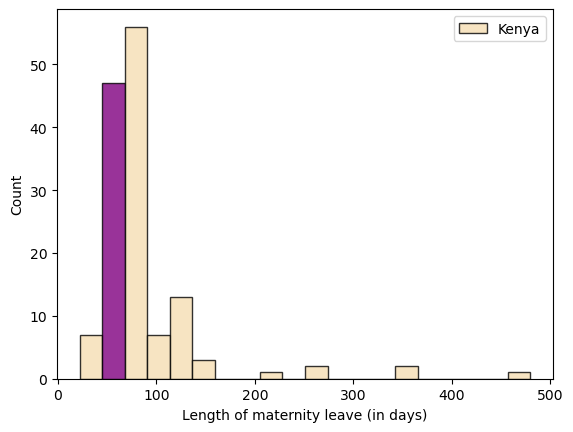

In [23]:
country = 'Kenya'
merge_val = merge.loc[country]['Length of maternity leave (in days)']
print(f"\033[1m{country}\033[0m")
print('Length of maternity (in days):', merge_val)
value = 'x'
print('Listed as:')
for column in merge.columns:
    column_values = str(merge.loc[country, column])
    if value in column_values:
        print(column)

n, bins, patches = plt.hist(merge['Length of maternity leave (in days)'], 
                            bins = 20, 
                            color = 'wheat', 
                            edgecolor = 'black', 
                            alpha = 0.8);

for i, bin_edge in enumerate(bins, start=-1):
    if bin_edge > merge_val:
        patches[i].set_facecolor('purple')
        break
        
plt.ylabel('Count')
plt.xlabel('Length of maternity leave (in days)')
plt.legend([country])        
plt.show()

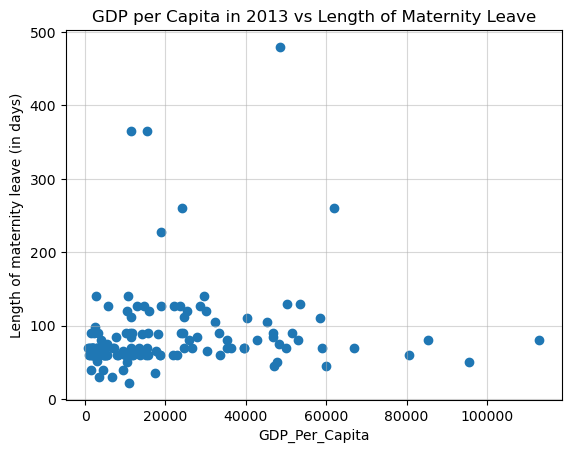

In [30]:
# compare gdp per capita and maternity leave days

plt.scatter(merge['GDP_Per_Capita'], merge['Length of maternity leave (in days)'])
plt.xlabel('GDP_Per_Capita')
plt.ylabel('Length of maternity leave (in days)')
plt.title('GDP per Capita in 2013 vs Length of Maternity Leave')
plt.grid(True, alpha = 0.5)
plt.show()

In [32]:
# correlation between gdp per capita and maternity leave days

print('Correlation between GDP per Capita in 2013 and Length of Maternity Leave:')
print(merge['GDP_Per_Capita'].corr(merge['Length of maternity leave (in days)']))

Correlation between GDP per Capita in 2013 and Length of Maternity Leave:
0.15563697046235583


This number shows that there is not that much correlation between GDP per Capita and maternity leave days. 

In [34]:
# compare the log of gdp per capita and maternity leave days

merge['GDP_log'] = np.log(merge['GDP_Per_Capita'])
print(merge)

                 Region Name  M49 Code ISO-alpha2 Code ISO-alpha3 Code  \
Country                                                                  
Algeria               Africa        12              DZ             DZA   
Egypt                 Africa       818              EG             EGY   
Morocco               Africa       504              MA             MAR   
Sudan                 Africa       729              SD             SDN   
Tunisia               Africa       788              TN             TUN   
...                      ...       ...             ...             ...   
Fiji                 Oceania       242              FJ             FJI   
Papua New Guinea     Oceania       598              PG             PNG   
Solomon Islands      Oceania        90              SB             SLB   
Vanuatu              Oceania       548              VU             VUT   
Kiribati             Oceania       296              KI             KIR   

                 Least Developed Coun

In [35]:
print('Correlation between log of GDP per Capita in 2013 and Length of Maternity Leave:')
print(merge['GDP_log'].corr(merge['Length of maternity leave (in days)']))

Correlation between log of GDP per Capita in 2013 and Length of Maternity Leave:
0.23057461210370866


There is a slightly higher correlation between log of GDP per capita and length of maternity leave than just GDP per capita data and length of maternity leave. Regardless, both correlation values are very low so there is a poor relationship between GDP per capita and length of maternity leave. 

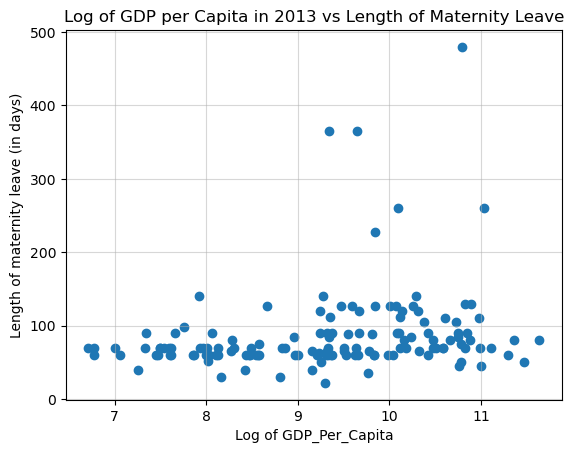

In [36]:
# scatterplot of log gdp per capita and maternity leave days

plt.scatter(merge['GDP_log'], merge['Length of maternity leave (in days)'])
plt.xlabel('Log of GDP_Per_Capita')
plt.ylabel('Length of maternity leave (in days)')
plt.title('Log of GDP per Capita in 2013 vs Length of Maternity Leave')
plt.grid(True, alpha = 0.5)
plt.show()

In the future, I would want a cleaner dataset, preferably looking at one county's top 100 companies and comparing their length of maternity leave. I would compare that country's data to several other countries that meets the criteria of a defined dataset with more than 100 companies. Besides or in addition to the GDP per capita, I would also compare the employment and unemployment data of each country. Maybe calculate the average amount of people that stay or leave in a company based on their list of benefits, especially maternity leave. Calculate the loss of money towards finding and rehiring another person vs the loss of money in updating their benefits to increase their maternity leave. 